## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data Cleaning and Consistency checks
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.




In [2]:
# This option ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create path
path = r'C:\Users\mngit\OneDrive\Data Analytics\Project Excercises\Achievement 6\World Happiness Report' 

In [4]:
#Import happiness Data set
df_happiness2 = pd.read_csv(os.path.join(path, '02 Data','Wrangled Data', 'happiness_wrangled.csv'), index_col = 0)

In [5]:
#check original shape
df_happiness2.shape

(785, 11)

### 2. Data cleaning and consistency checks

In [6]:
df_happiness2.head(5)

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity
0,Afghanistan,2015,Southern Asia,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365
1,Afghanistan,2016,Southern Asia,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313
2,Afghanistan,2017,Southern Asia,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061
3,Afghanistan,2018,Southern Asia,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036
4,Afghanistan,2019,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [7]:
#find categorical data - method 1
df_happiness2.dtypes

Country                          object
Year                              int64
Region                           object
Happiness Rank                  float64
Happiness Score                 float64
Economy (GDP per Capita)        float64
Social Support                  float64
Health (Life Expectancy)        float64
Freedom to make life choices    float64
Lack of Corruption              float64
Donations to Charity            float64
dtype: object

In [8]:
#find categorical data - method 2
dfcategory = df_happiness2.select_dtypes(include=['object']).copy()
dfcategory.head()

,Country,Region
0,Afghanistan,Southern Asia
1,Afghanistan,Southern Asia
2,Afghanistan,Southern Asia
3,Afghanistan,Southern Asia
4,Afghanistan,Southern Asia


## Encoding
#### To convert categorical variables to integers (nominal variable 0 and 1)

#### Label Encoding

In [9]:
# cast a pandas object to a specified dtype
df_happiness2["Country"] = df_happiness2 ["Country"].astype('category')

In [10]:
#use catcode to convert category type
df_happiness2["Country_cat"] = df_happiness2["Country"].cat.codes

In [11]:
df_happiness2.head(15)

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,Country_cat
0,Afghanistan,2015,Southern Asia,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,0
1,Afghanistan,2016,Southern Asia,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,0
2,Afghanistan,2017,Southern Asia,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061,0
3,Afghanistan,2018,Southern Asia,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,0
4,Afghanistan,2019,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
5,Albania,2015,Central and Eastern Europe,95.0,4.959,0.879,0.804,0.813,0.357,0.064,0.143,1
6,Albania,2016,Central and Eastern Europe,109.0,4.655,0.955,0.502,0.730,0.319,0.053,0.168,1
7,Albania,2017,Central and Eastern Europe,109.0,4.644,0.996,0.804,0.731,0.381,0.201,0.040,1
8,Albania,2018,Central and Eastern Europe,112.0,4.586,0.916,0.817,0.790,0.419,0.149,0.032,1
9,Albania,2019,Central and Eastern Europe,107.0,4.719,0.947,0.848,0.874,0.383,0.178,0.027,1


### Above method keeps country column and may create unwanted hierachy(algorithm misinterpratation)

#### Method below not very clear??

In [13]:
from sklearn import preprocessing #import label encoder
df_happiness_LE = df_happiness2
label_encoder = preprocessing.LabelEncoder() 
df_happiness_LE['Country'] = label_encoder.fit_transform(df_happiness_LE['Country'])
print(df_happiness_LE.head())

df_happiness_LE.head()

   Country  Year         Region  Happiness Rank  Happiness Score  \
0        0  2015  Southern Asia           153.0            3.575   
1        0  2016  Southern Asia           154.0            3.360   
2        0  2017  Southern Asia           141.0            3.794   
3        0  2018  Southern Asia           145.0            3.632   
4        0  2019  Southern Asia           154.0            3.203   

   Economy (GDP per Capita)  Social Support  Health (Life Expectancy)  \
0                     0.320           0.303                     0.303   
1                     0.382           0.110                     0.173   
2                     0.401           0.582                     0.181   
3                     0.332           0.537                     0.255   
4                     0.350           0.517                     0.361   

   Freedom to make life choices  Lack of Corruption  Donations to Charity  \
0                         0.234               0.097                 0.365  

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,Country_cat
0,0,2015,Southern Asia,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,0
1,0,2016,Southern Asia,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,0
2,0,2017,Southern Asia,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061,0
3,0,2018,Southern Asia,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,0
4,0,2019,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0


#### One-Hot Encoder

In [14]:
df_happiness2.shape


(785, 12)

In [15]:
#change Country records to individual columns for each record

pd.get_dummies(df_happiness2.Country)

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
pd.get_dummies(df_happiness2).shape

(785, 22)

In [17]:
pd.get_dummies(df_happiness2).head(5)

,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,...,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Region_middle East and Northern Africa
0,0,2015,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,...,0,0,0,0,0,0,1,0,0,0
1,0,2016,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,...,0,0,0,0,0,0,1,0,0,0
2,0,2017,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061,...,0,0,0,0,0,0,1,0,0,0
3,0,2018,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,...,0,0,0,0,0,0,1,0,0,0
4,0,2019,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,...,0,0,0,0,0,0,1,0,0,0


In [18]:
dftry = pd.get_dummies(df_happiness2)

In [19]:
dftry.shape

(785, 22)

In [20]:
dftry.head(5)

,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,...,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Region_middle East and Northern Africa
0,0,2015,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,...,0,0,0,0,0,0,1,0,0,0
1,0,2016,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,...,0,0,0,0,0,0,1,0,0,0
2,0,2017,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061,...,0,0,0,0,0,0,1,0,0,0
3,0,2018,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,...,0,0,0,0,0,0,1,0,0,0
4,0,2019,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,...,0,0,0,0,0,0,1,0,0,0


### 3. The elbow technique

In [53]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [54]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(dftry).score(dftry) for i in range(len(kmeans))] 

score

[-3314486.3342328416,
 -2065928.2250791658,
 -1305689.9190965998,
 -830241.2173502353,
 -650918.1568488333,
 -551896.3531040048,
 -465115.7989733323,
 -398077.4265613158,
 -344717.5652170214]

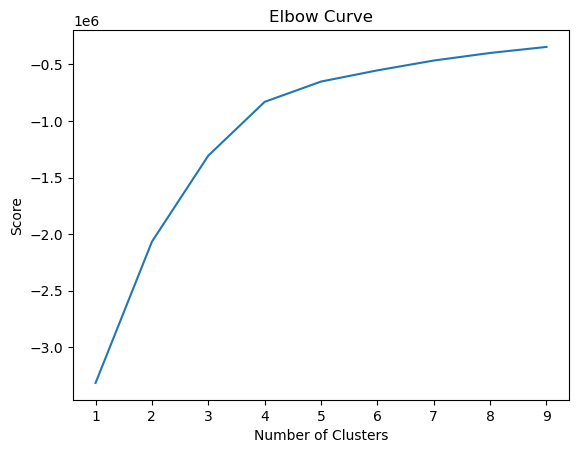

In [55]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Elbow_curve.png')) #Export Elbow curve
pl.show()

#### The breaking point of the curve is between 2-3 indicating that the optimal number of clusters to use is 3

### 3. k-means clustering

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [57]:
# Fit the k-means object to the data.

kmeans.fit(dftry)

KMeans(n_clusters=3)

In [58]:
# Attach a new column to dataframe with the resulting clusters
dftry['clusters'] = kmeans.fit_predict(dftry)

In [59]:
dftry.head()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,Country_cat,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo (Brazzaville),Country_Congo (Kinshasa),Country_Costa Rica,Country_Croatia,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hong Kong,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Ivory Coast,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kosovo,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Macedonia,Country_Northern Cyprus,Country_Norway,Country_Pakistan,Country_Palestinian Territories,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Region_middle East and Northern Africa,clusters
0,2015,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
1,2016,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
df_happinesscopy['clusters'] = df_happiness_ML['clusters']
df_happinesscopy.head()
df_happinesscopy['clusters'].value_counts()
df_happinesscopy.to_csv('country_clusters.csv')

In [60]:
# check how many observations fall into each cluster
dftry['clusters'].value_counts()

1    316
2    251
0    218
Name: clusters, dtype: int64

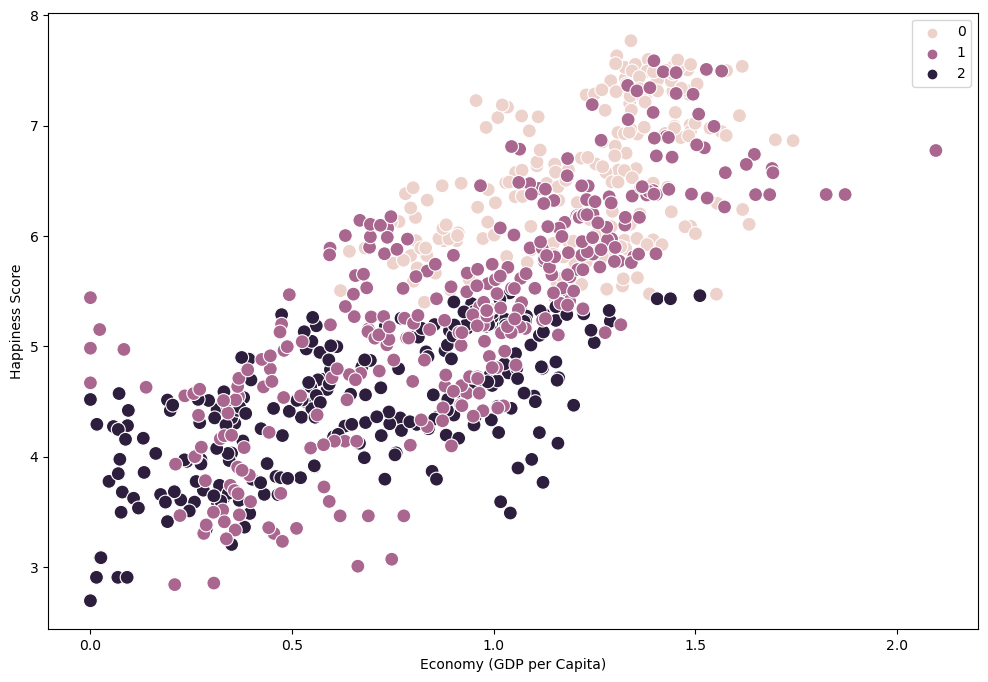

In [61]:
# i) Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dftry['Economy (GDP per Capita)'], y=dftry['Happiness Score'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Economy.png')) #Export Cluster plot
plt.show()

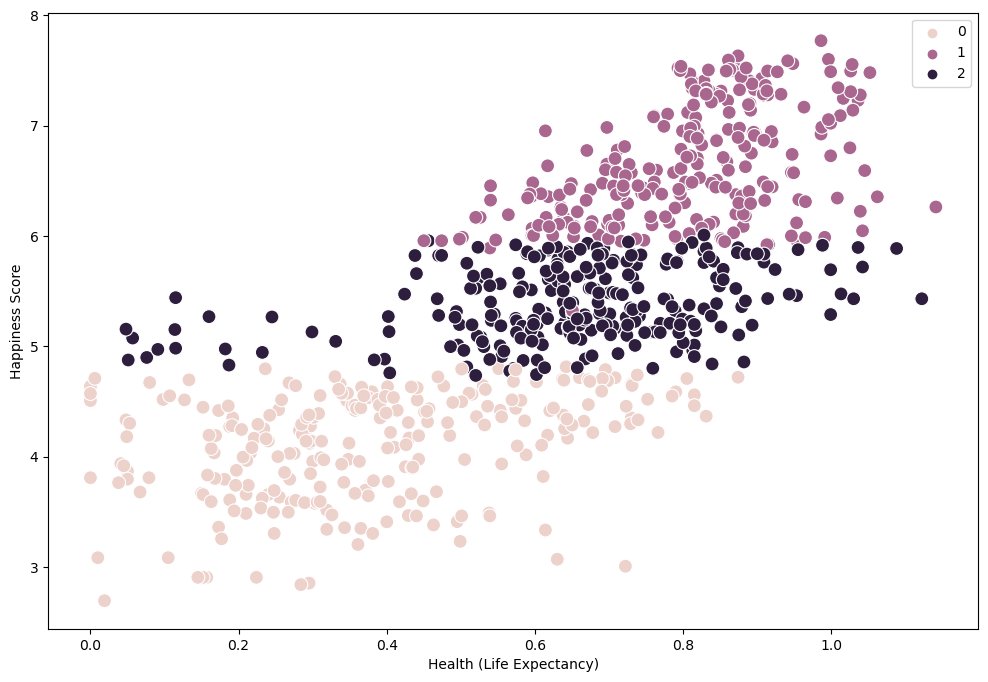

In [23]:
# ii) Plot the clusters for the "Health (Life Expectancy)" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Health (Life Expectancy)'], y=df_happiness_ML['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Health (Life Expectancy)') 
plt.ylabel('Happiness Score') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Health.png')) #Export Cluster plot
plt.show()

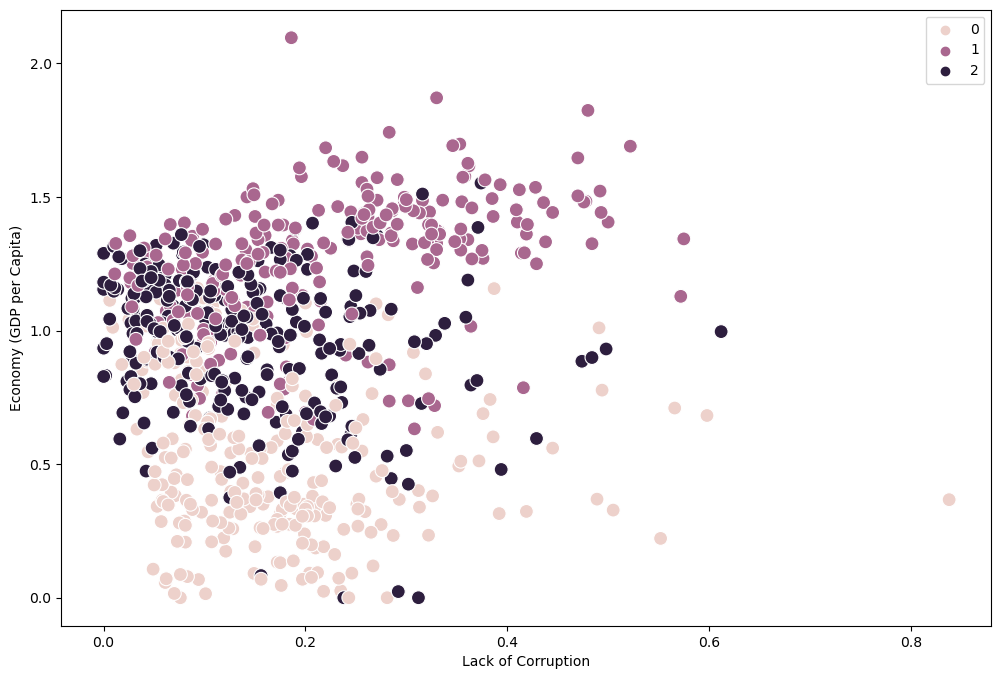

In [24]:
# iii) Plot the clusters for the "Lack of Corruption" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Lack of Corruption'], y=df_happiness_ML['Economy (GDP per Capita)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Lack of Corruption') 
plt.ylabel('Economy (GDP per Capita)') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Corruption.png')) #Export Cluster plot
plt.show()

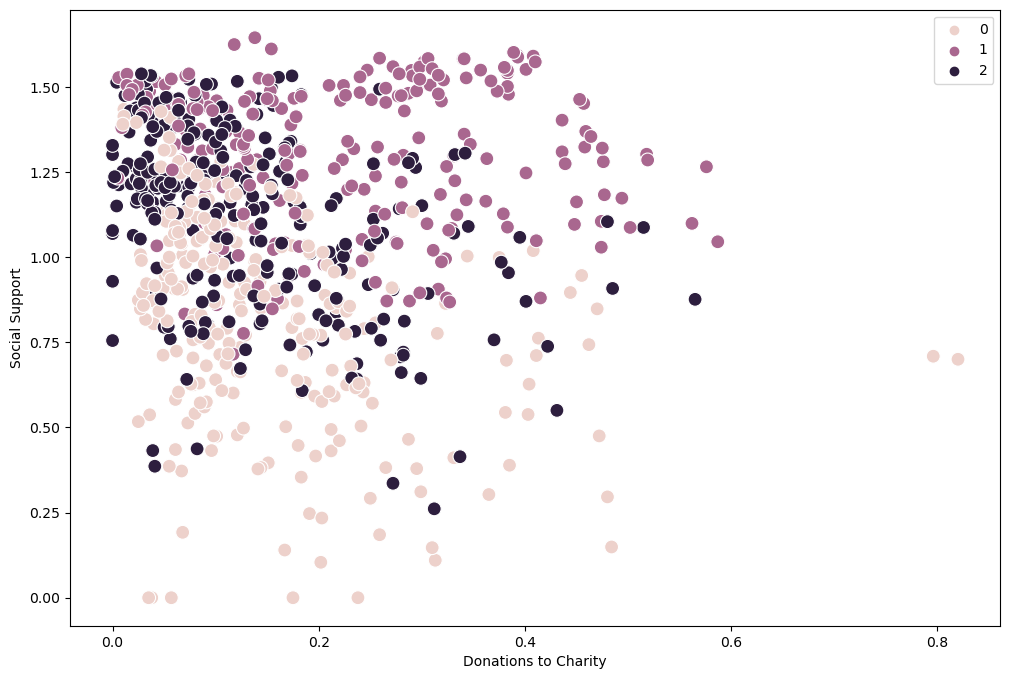

In [25]:
# iv) Plot the clusters for the "Donations to Charity" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Donations to Charity'], y=df_happiness_ML['Social Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Donations to Charity') 
plt.ylabel('Social Support') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Family.png')) #Export Cluster plot
plt.show()

#### Observations
##### i)  "Happiness Score" and "Economy (GDP per Capita)" variables

######      - Purple cluster has mainly low to moderate GDP and low Happiness Score of less than 5
######      - Dark purple clusters represent countries having moderate GDP and Happiness Score apart from 4 points that have very low GDP but                         still  show  moderate  Happiness Score.
######      - The pink cluster represents countries with above average  GDP and also above average Happiness Score with the exception of 1 point                        that has average Happiness Score

##### ii)  "Health (Life Expectancy)" and "Happiness Score" variables
######      - The dark purple cluster has low, medium and High Health (Life Expectancy) but only has average Happiness scores
######      - The entire pink cluster has only high Happiness Scores and medium to high Health (Life Expectancy) 

##### iii)   "Lack of Corruption" and "Economy (GDP per Capita)"
######      - All the clusters are  mainly in the bottom right corner of the chart apart from a few points - This could be an indication that GDP of a                               country doesn't indicate high or low corruption levels

##### iv)    "Donations to Charity" and "Social Support"
######      -  All the clusters are  mainly in the top right corner and center of the chart show that many countries indicate having medium t high                               social support but that doesn't affect how generous they are

In [26]:
# relabel clusters from numbers to color names

df_happiness_ML.loc[df_happiness_ML['clusters'] == 2, 'cluster'] = 'dark purple'
df_happiness_ML.loc[df_happiness_ML['clusters'] == 1, 'cluster'] = 'purple'
df_happiness_ML.loc[df_happiness_ML['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
# calculate descriptive statistics for the clusters

df_happiness_ML.groupby('cluster').agg({'Health (Life Expectancy)':['mean', 'median'], 
                                        'Social Support':['mean', 'median'], 
                                        'Economy (GDP per Capita)':['mean', 'median'],
                                        'Donations to Charity':['mean', 'median'],             
                                        'Happiness Score':['mean', 'median']})

Health (Life Expectancy)         Social Support          \
                                mean  median           mean  median   
cluster                                                               
dark purple                  0.65800  0.6645       1.123359  1.1625   
pink                         0.38361  0.3590       0.816726  0.8520   
purple                       0.80046  0.8145       1.298184  1.3190   

            Economy (GDP per Capita)         Donations to Charity          \
                                mean  median                 mean  median   
cluster                                                                     
dark purple                 0.964321  1.0030             0.130237  0.1005   
pink                        0.528463  0.4720             0.151703  0.1130   
purple                      1.257831  1.3005             0.209061  0.1720   

            Happiness Score          
                       mean  median  
cluster                              
dark purple        5.389935  5.3430  
pink               4.117104  4.2360  
purple             6.600720  6.4885

#### Observations
##### •	The Pink cluster has the best stats for all categories with a significantly higher mean Happiness Score of 6.6
##### •  Health (Life Expectancy) of the purple cluster is much lower than the other two clusters
##### •  The dark purple cluster has a perfectly symmetrical distribution of Health (Life Expectancy)


### Future steps of an analytics pipeline
####  1. Determine variable similarities between countries that have high Happiness Score
####  2. Analyze if Happiness Scores of each country are consistent year on year
####  3. Investigate if Happiness Score by Region


In [28]:
 #exporting cleaned  data frame
df_happiness_ML.to_csv(os.path.join(path, '02 Data','Wrangled Data', 'df_happiness_ML_Cluster.csv'))